In [1]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('whatsapp-chat-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


In [5]:
df.sample(10)

,date_time,user,message
3053,2020-03-13 21:03:00,"Dheeraj Lalwani (TSEC, CS)",Sad
5618,2020-05-02 17:08:00,"Tanay Kamath (TSEC, CS)",ohk
6701,2020-05-28 02:40:00,"Harsh Kapadia (TSEC IT, SE)",True true
2766,2020-03-07 19:12:00,"Darshan Rander (TSEC, IT)",Let's see mera logic galat tha ya site ka issu...
5531,2020-04-30 18:34:00,"Dheeraj Lalwani (TSEC, CS)",This is wow!! Great work
292,2020-01-28 19:25:00,"Saket (TSEC, CS)",
2073,2020-02-24 22:15:00,"Darshan Rander (TSEC, IT)",Abhi sunday ko
9399,2020-08-06 23:17:00,"Tanay Kamath (TSEC, CS)",not bad
3102,2020-03-14 17:54:00,"Dheeraj Lalwani (TSEC, CS)",Canceled or postponed?
3850,2020-03-24 20:59:00,+91 97027 35002,Read the manga


In [6]:
df[df['message'] == ""].shape[0]

538

In [7]:
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month_name
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [8]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


# *Data Analysis*

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 10 active users on the group (with a twist).**
- Ghosts present in the group. (shocking results.)

**4. Top 10 users most sent media.**

**5. Top 10 most used emojis.**

**6. Most active hours and days.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**

# 1. Overall frequency of total messages on the group.


In [9]:
df1 = df.copy()      

df1['message_count'] = [1] * df1.shape[0]     
df1.drop(columns='year', inplace=True)         
df1 = df1.groupby('date').sum().reset_index()
df1

,date,message_count
0,2020-01-24,1
1,2020-01-26,105
2,2020-01-27,90
3,2020-01-28,126
4,2020-01-29,118
...,...,...
237,2020-09-28,144
238,2020-09-29,49
239,2020-09-30,167
240,2020-10-01,91


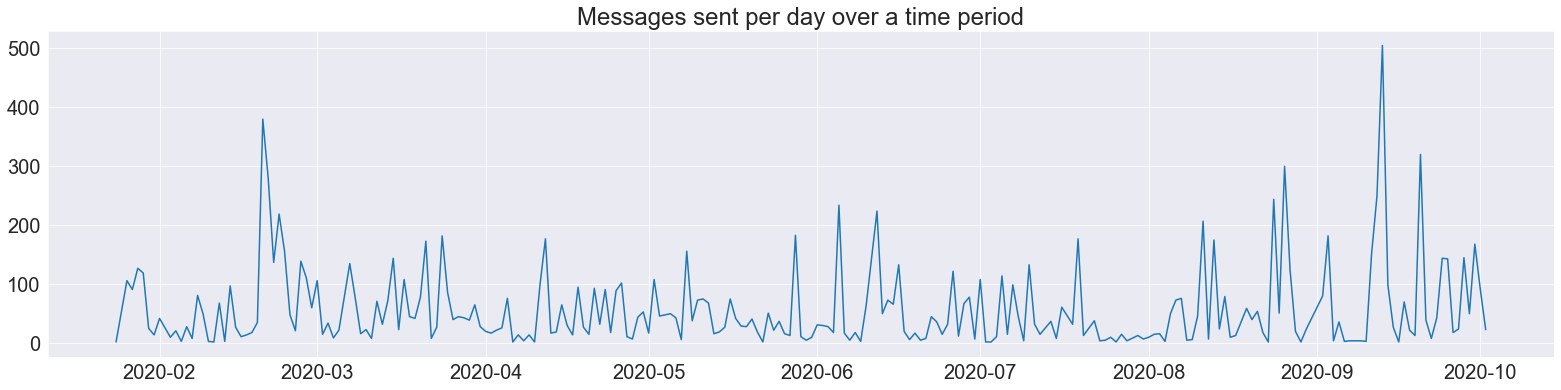

In [10]:
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');
plt.savefig('msg_plots.svg', format = 'svg')

# 2 *Top 10 most active days.*

In [11]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    
top10days.reset_index(inplace=True)          
top10days.drop(columns="index", inplace=True) 
top10days

,date,message_count
0,2020-09-13,504
1,2020-02-20,379
2,2020-09-20,319
3,2020-08-26,299
4,2020-02-21,278
5,2020-09-12,249
6,2020-08-24,243
7,2020-06-05,233
8,2020-06-12,223
9,2020-02-23,218


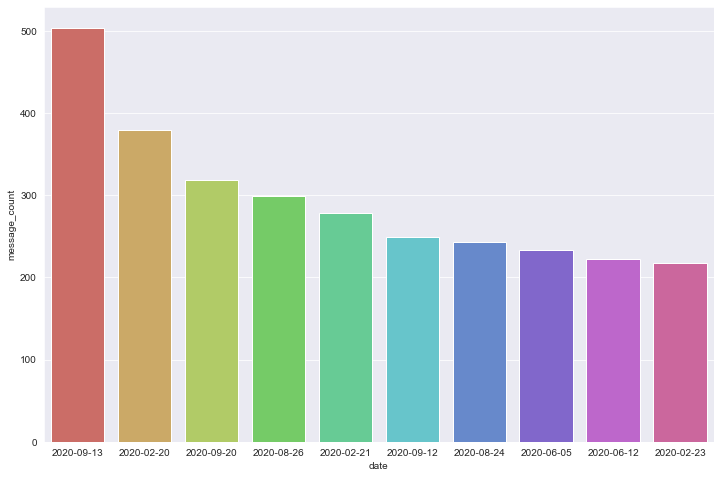

In [12]:

import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

sns.barplot(top10days.date, top10days.message_count, palette="hls");

plt.savefig('top10_days.svg', format = 'svg')

# 3. Top 10 active users on the group.

In [14]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

top10df = top10df.head(10).reset_index()
top10df

,user,message
0,"Tanay Kamath (TSEC, CS)",2528
1,"Dheeraj Lalwani (TSEC, CS)",1937
2,"Darshan Rander (TSEC, IT)",1404
3,"Kartik Soneji (TSEC, CS)",841
4,"Harsh Kapadia (TSEC IT, SE)",790
5,"Pratik K (TSEC CS, SE)",781
6,"Saurav Upoor (TSEC CS, SE)",569
7,Tushar Nankani,354
8,+91 82916 21138,275
9,"Farhan Irani (TSEC IT, SE)",255


##### Plotting a simple line graph.

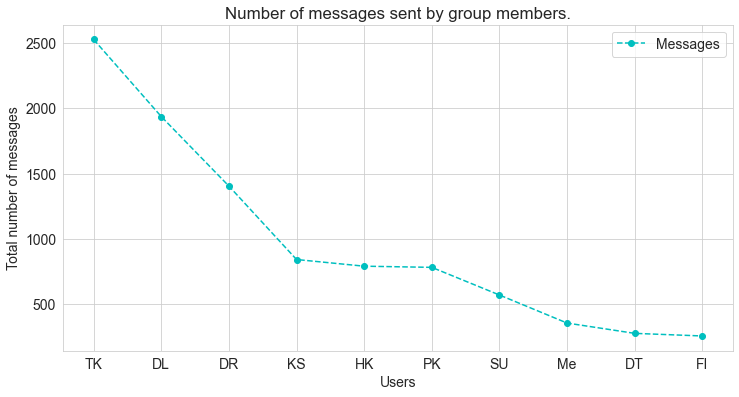

In [17]:
plt.plot(top10df.initials, top10df.message, 'o--c')  

plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);


### *Beautifying Default Styles using Seaborn*

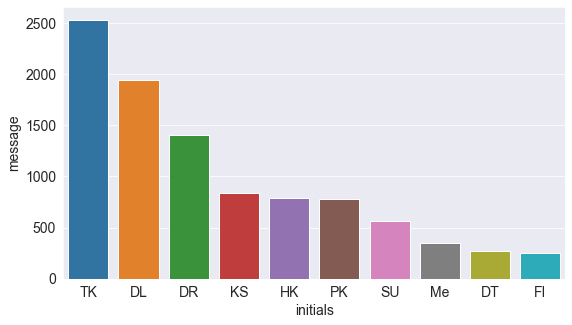

In [19]:
sns.set_style("darkgrid")
sns.barplot(top10df.initials, top10df.message, data=top10df);

## Now, finding the *average message length* of the 10 most active users of the group.

In [22]:

df2['message_length'] = df2['message'].apply(lambda x: len(x))      

avg_msg_lengths = df2.groupby(df2.user).mean().reset_index().sort_values(by = 'message_length', ascending = False)


# 5. Top 10 most used Emojis
- Will be using the `emoji` module, that was imported earlier.

In [26]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

### Which Emoji is the most used in the chat?

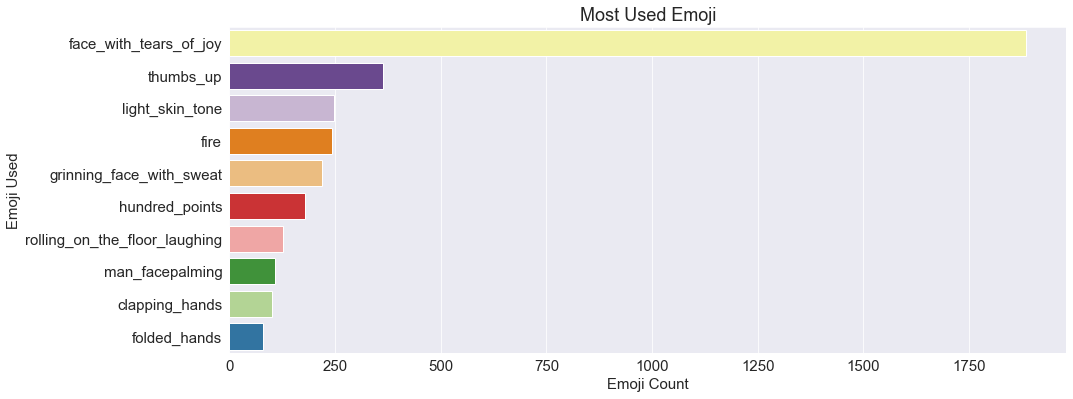

In [28]:

sns.set_style("darkgrid")
sns.barplot(top10emojis.emoji_count, top10emojis.emoji_description, palette = "Paired_r")

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used');

# Saving the plots
plt.savefig('top10emoji.svg', format = 'svg')

# 6. Most active days, most active hours, most active months.

### *Pre-processing*

In [29]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    # helper column to keep a count.

df3['hour'] = df3['date_time'].apply(lambda x: x.hour)

grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

### Which hour of the day are most messages exchanged?

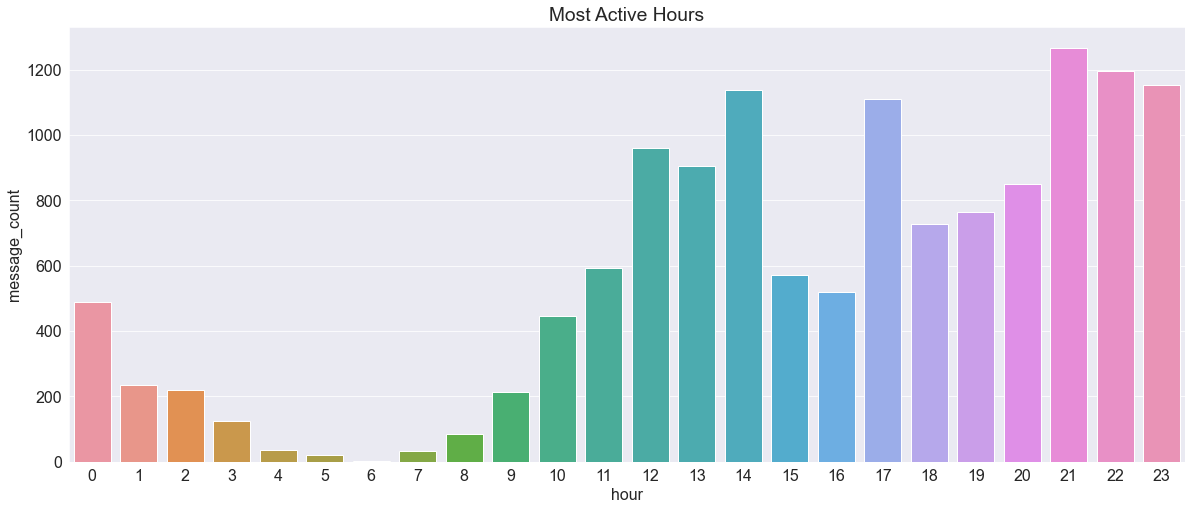

In [30]:
sns.set_style("darkgrid")
sns.barplot(grouped_by_time.hour, grouped_by_time.message_count)
plt.title('Most Active Hours');

plt.savefig('most_active_hours.svg', format = 'svg')

In [31]:

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']  
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]
